In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


import warnings
warnings.filterwarnings("ignore")

In [3]:
df= pd.read_csv('titanic_data.csv')


sns.set(rc={'figure.figsize':(12, 10)})

In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
# What are the features of this data
df.axes

[RangeIndex(start=0, stop=891, step=1),
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
        'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object')]

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Correlation with other variable
df[["Survived","SibSp","Parch","Age","Fare"]].corr()

,Survived,SibSp,Parch,Age,Fare
Survived,1.000000,-0.035322,0.081629,-0.077221,0.257307
SibSp,-0.035322,1.000000,0.414838,-0.308247,0.159651
Parch,0.081629,0.414838,1.000000,-0.189119,0.216225
Age,-0.077221,-0.308247,-0.189119,1.000000,0.096067
Fare,0.257307,0.159651,0.216225,0.096067,1.000000


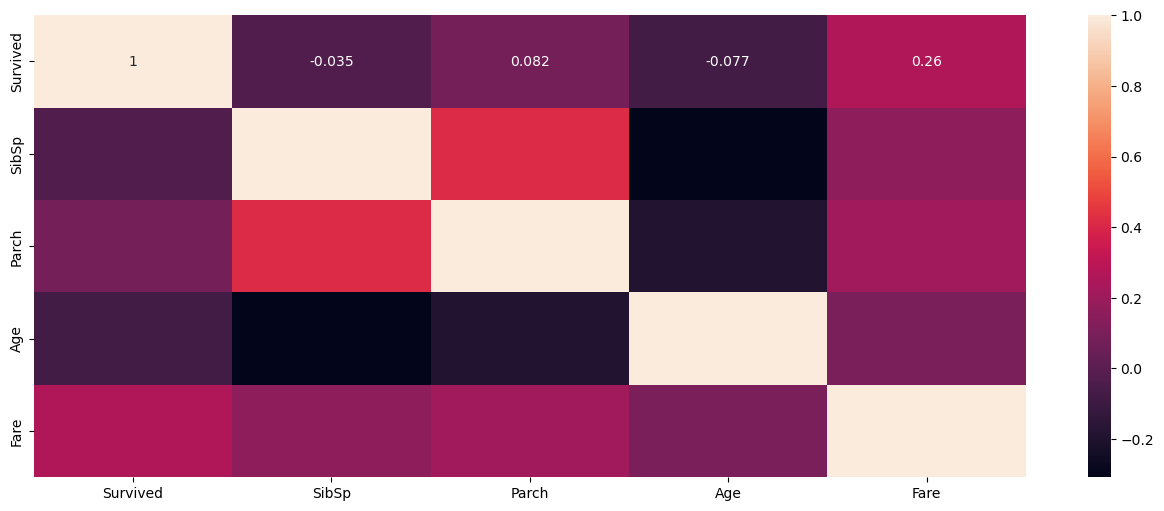

In [9]:
# Numerical value Analysis
# 
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(df[["Survived","SibSp","Parch","Age","Fare"]].corr(), annot=True)

In [10]:
#Number of sibling and spouse aboard the titanic

df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

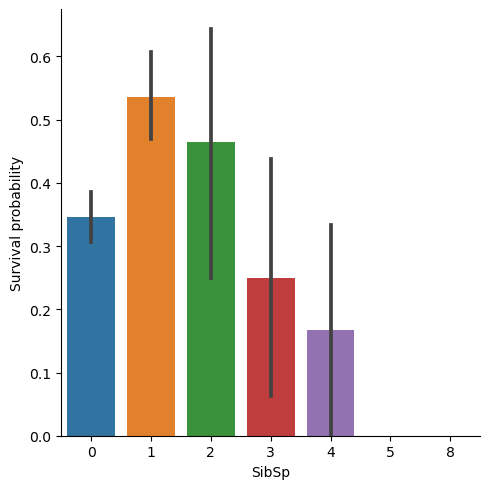

In [11]:
# Plotting 
bargraph_sibsp = sns.catplot(x = "SibSp", y = "Survived", data = df, kind = "bar").set_ylabels("Survival probability")

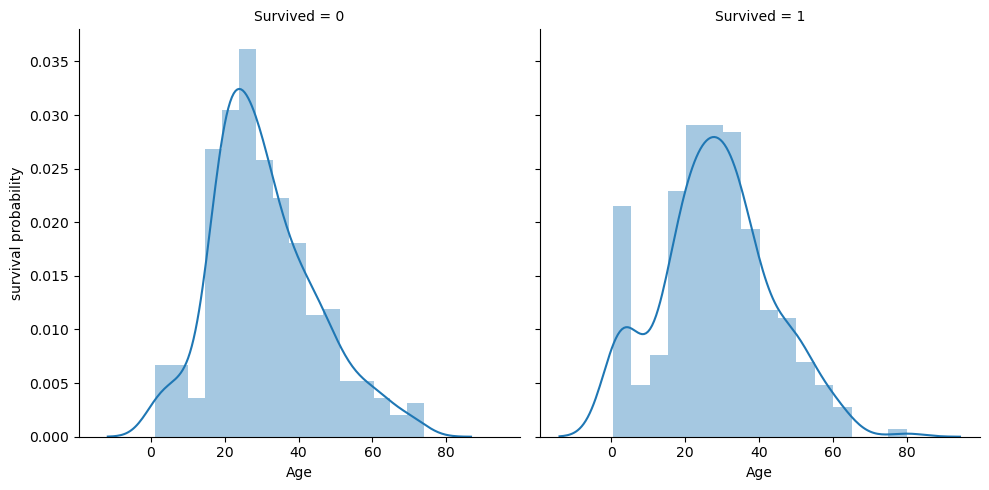

In [12]:
# Age
# Rather than fill na of age with the randint we can also put -0.5 as unknown 

age_visual = sns.FacetGrid(df, col = 'Survived',height=5)
age_visual = age_visual.map(sns.distplot, "Age")
age_visual = age_visual.set_ylabels("survival probability")

177


<Axes: xlabel='AgeGroup', ylabel='Survived'>

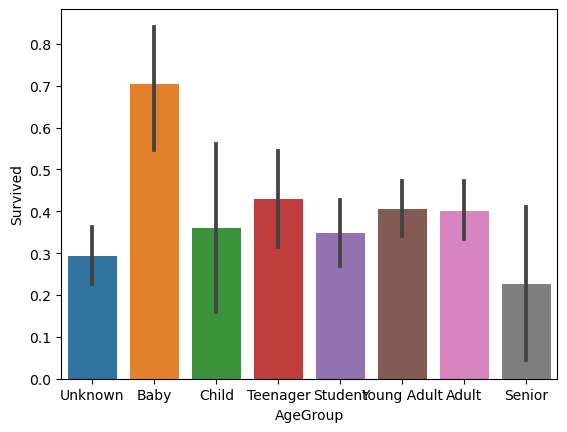

In [13]:
# For visulaisatioon of the age group which is null
# Another process with out filling randomly
print (df['Age'].isnull().sum())

df['Age'] = df['Age'].fillna(-0.5)
bins = [-1, 0 , 5 , 12, 18, 24, 35 , 60 , np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager','Student','Young Adult','Adult', 'Senior']

df_new = df.copy()
df_new['AgeGroup'] = pd.cut ( df['Age'],bins, labels = labels);

df_new.drop('Age',axis='columns',inplace=True)

df_new

sns.barplot(x='AgeGroup', y = 'Survived', data= df_new)



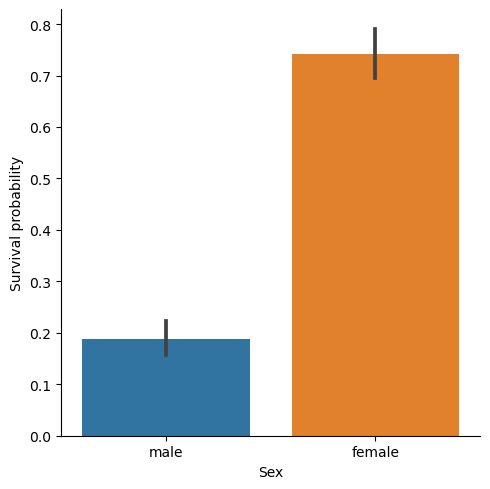

In [14]:
# Sex femals have higher probability of survival
bargraph_sex = sns.catplot(x = "Sex", y = "Survived", data = df, kind = "bar").set_ylabels("Survival probability")

In [15]:
# Finding the mean
df[["Sex","Survived"]].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [16]:
# First class Survived> Second class Survived > Third class
# for percentage use df['Survived'][ df['Pclass'] == 1].value_counts(normalize = True)[1] * 100
df[['Survived','Pclass']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


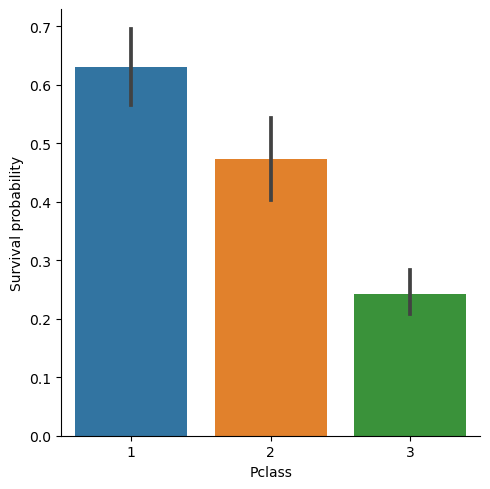

In [17]:
# First class higher chances of survival
bargraph_sex = sns.catplot(x = "Pclass", y = "Survived", data = df, kind = "bar").set_ylabels("Survival probability")

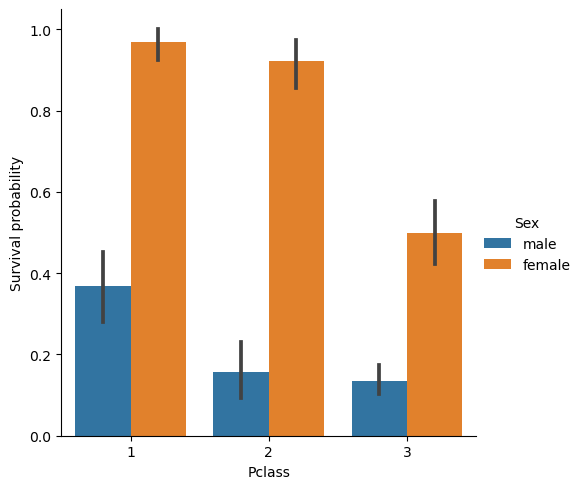

In [18]:
# First class higher chances of survival
bargraph_sex = sns.catplot(x = "Pclass", y = "Survived", data = df, kind = "bar",hue='Sex').set_ylabels("Survival probability")

In [19]:
# Embarked
df['Embarked'].value_counts()
# Majority is south

df['Embarked'].fillna('S',inplace = True)

# df["Embarked"].isnull().sum()

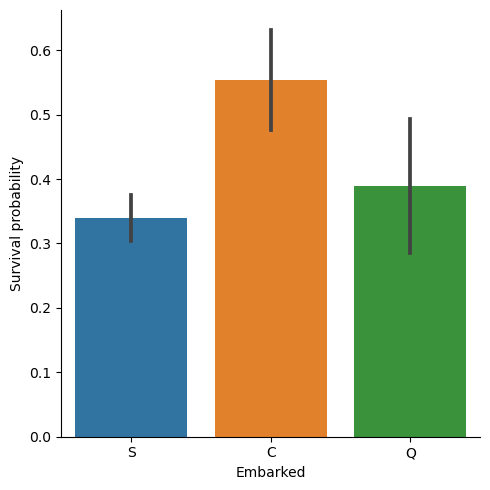

In [20]:
# sns.catplot(x=df["Embarked"], y =df["Survived"], kind='bar')

bargraph_embarked = sns.catplot(x = "Embarked", y = "Survived", data = df, kind = "bar").set_ylabels("Survival probability")

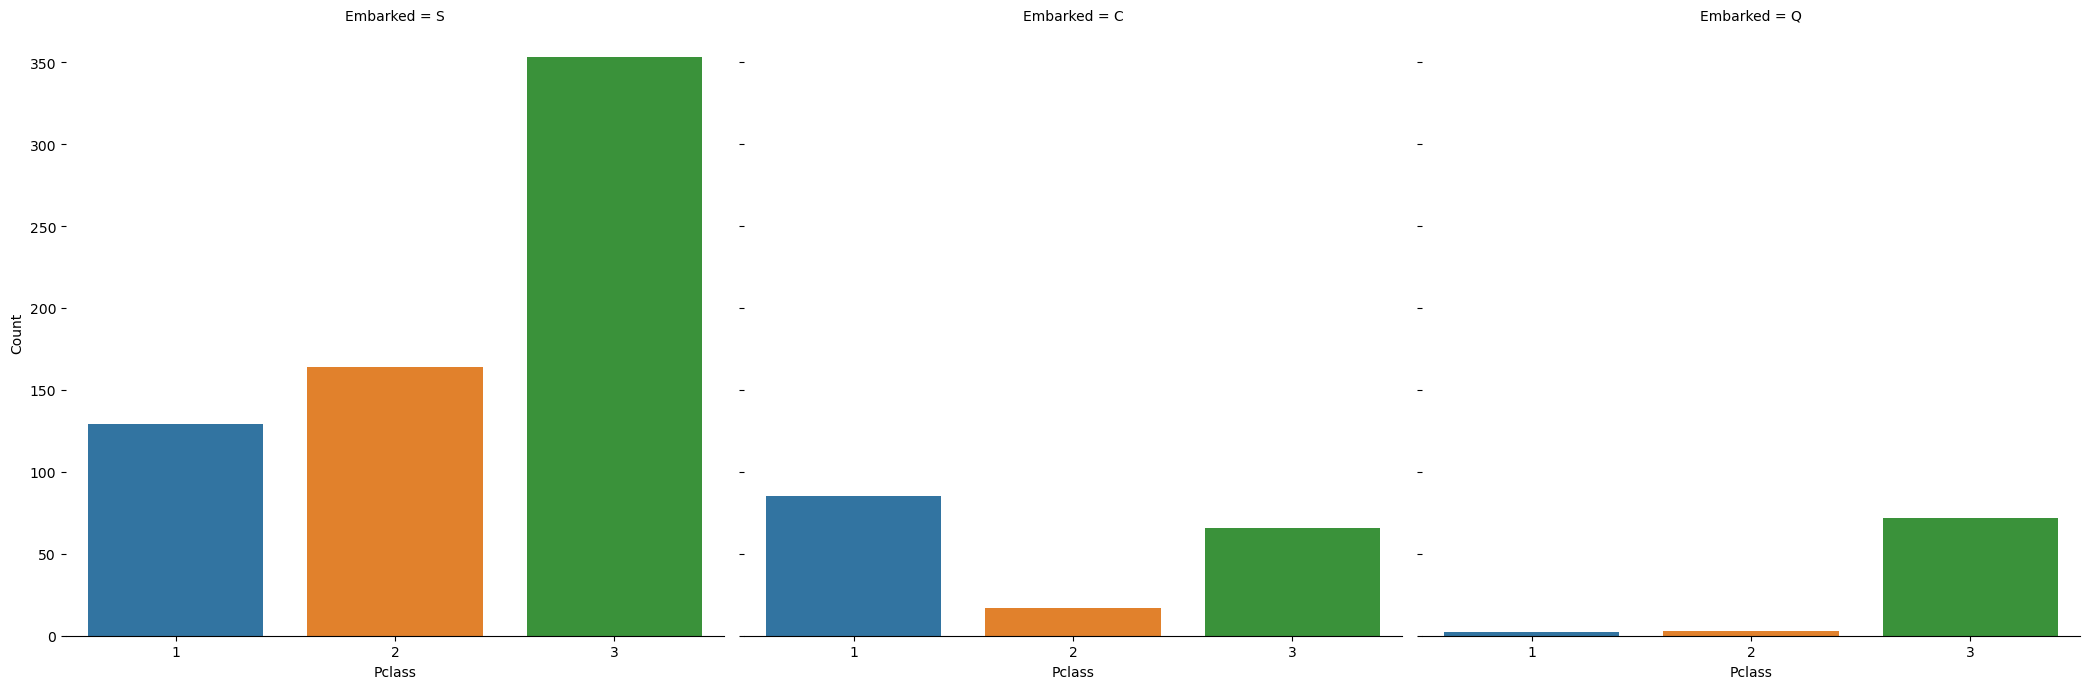

In [21]:
g = sns.catplot(x="Pclass", col="Embarked",  data=df, height=7, kind="count")
g.despine(left=True)
g = g.set_ylabels("Count")

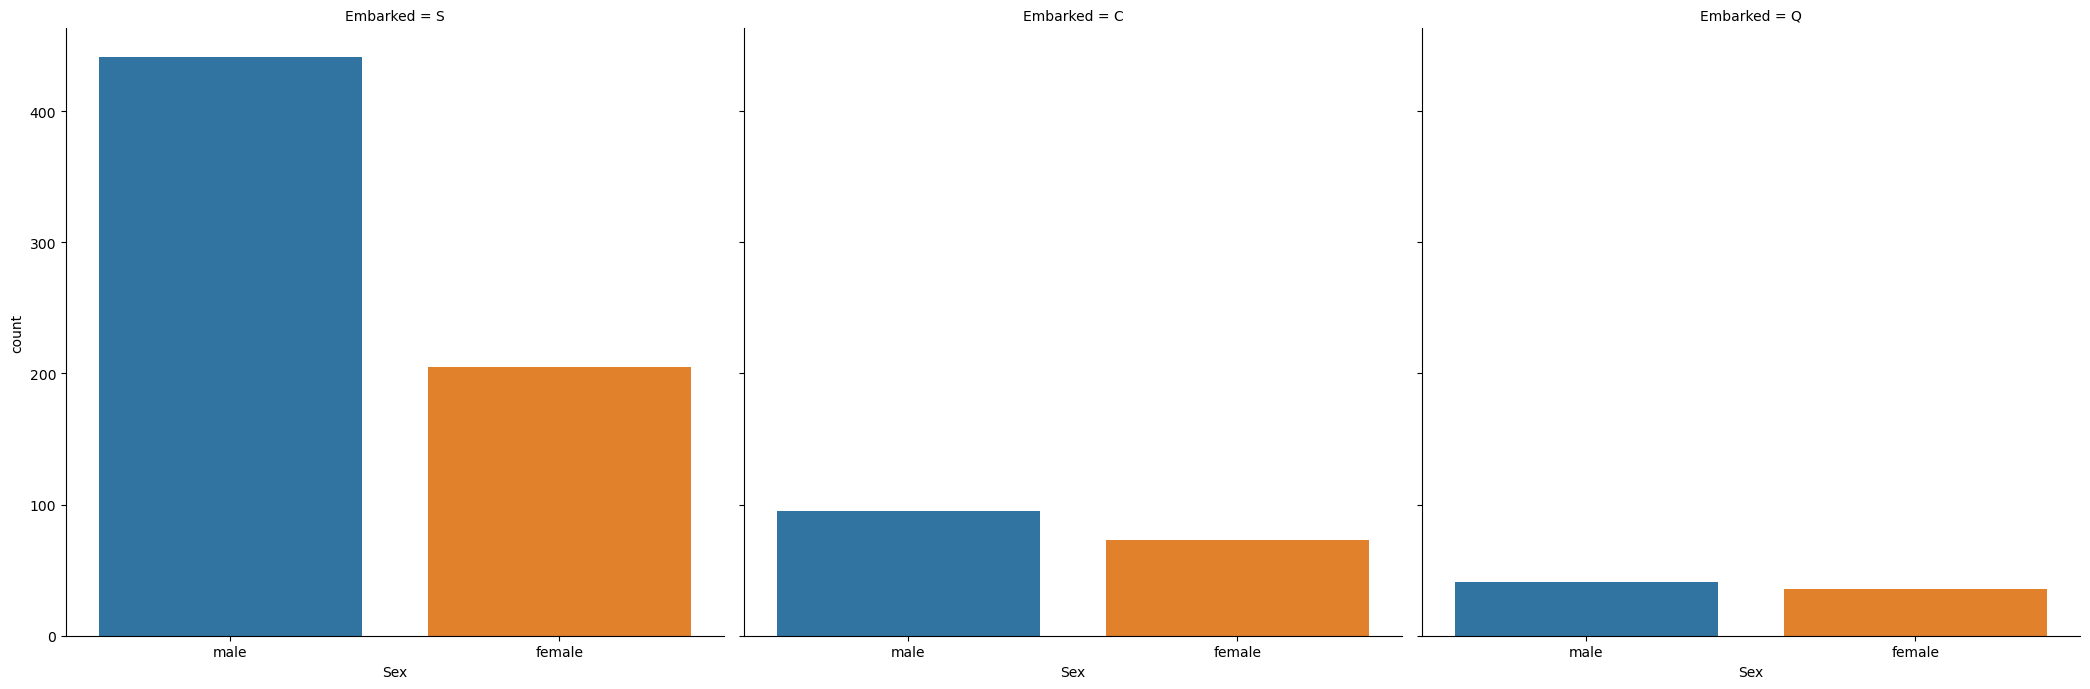

In [22]:
g = sns.catplot(x="Sex", col="Embarked",  data=df, height=7, kind="count")

In [23]:
df = pd.read_csv('titanic_data.csv')

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [25]:
df['Age'].isnull().sum()

177

In [26]:
df['Cabin'].isnull().sum()

687

In [27]:
# Another way to fill the age 
df_new['Title']= df_new.Name.str.extract(' ([A-Za-z]+)\.',expand= False)
# pd.crosstab(df_new['Title'],df_new['Sex'])

df_new['Title'] = df_new['Title'].replace(["Col","Capt", "Don","Dr", "Jonkheer","Lady","Major", "Rev"],'Rare')

df_new['Title'] = df_new['Title'].replace(["Countess","Lady","Sir"],'Royal')

df_new['Title'] = df_new['Title'].replace([ "Col","Capt", "Don","Dr", "Jonkheer","Lady","Major", "Rev"],'Rare')

df_new['Title'] = df_new['Title'].replace("Mlle",'Miss')

df_new['Title'] = df_new['Title'].replace("Ms",'Miss')

df_new['Title'] = df_new['Title'].replace("Mme",'Mrs')

print (df_new[['Title','Survived']].groupby(['Title'], as_index = False).mean())


# mapping
title_mapping = {'Mr':1 , 'Miss':2, 'Mrs':3, 'Master': 4, 'Royal': 5, 'Rare': 6 }
df_new ['Title'] = df_new['Title'].map(title_mapping)
df_new['Title'] = df_new['Title'].fillna(0)

df_new.head(10)

mr_age = df_new[ df_new['Title'] == 1]['AgeGroup'].mode() # Young adult
miss_age = df_new[ df_new['Title'] == 2]['AgeGroup'].mode()  # Student
mrs_age = df_new[ df_new['Title'] == 3]['AgeGroup'].mode() # Adult
master_age = df_new[ df_new['Title'] == 4]['AgeGroup'].mode() #Baby
royal_age = df_new[ df_new['Title'] == 5]['AgeGroup'].mode()
rare_age = df_new[ df_new['Title'] == 6]['AgeGroup'].mode()
age_title_map = { 1 : 'Young Adult', 2 : 'Student' , 3: 'Adult' , 4 : 'Baby', 5:'Adult', 6: 'Adult' }

for i in range (len ( df_new['AgeGroup'] )):
    if(df_new['AgeGroup'][i] == "Unknown"):
        df_new['AgeGroup'][i] = age_title_map [ df_new ['Title'][i]  ]



df_new.AgeGroup.unique()

# Catrogorial to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
transform = [ 'Sex', 'AgeGroup', 'Embarked' ]

for i in transform:
    df_new[i] = le.fit_transform( df_new[i] )


    Title  Survived
0  Master  0.575000
1    Miss  0.702703
2      Mr  0.156673
3     Mrs  0.793651
4    Rare  0.285714
5   Royal  1.000000


In [28]:
# Managing the null value with giving val between mean-stdDeviation and mean + stdDeviation as our Age distribution is 
# normal distribution
mean = df['Age'].mean()
std = df["Age"].std()

# count total null in age 
is_null = df["Age"].isnull().sum()

# random number of numpyarray between the desire range with total size = number of null value there.
rand_age = np.random.randint(mean - std, mean + std, size = is_null)

# fill NaN values in Age column with random values generated
age_slice = df["Age"].copy()
age_slice[np.isnan(age_slice)] = rand_age
df["Age"] = age_slice

In [29]:
df['Age'].isnull().sum()

0

In [30]:
df['Embarked'].value_counts(normalize = True)

Embarked
S    0.724409
C    0.188976
Q    0.086614
Name: proportion, dtype: float64

In [31]:
# Fill th null of embarked with S as mean for S is > 
df['Embarked'].fillna('S',inplace = True)

In [32]:
# drop the unecessary columns that did not plays an important role
df.drop(columns={"Cabin" ,"Ticket","Name"},inplace=True)

df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,36.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [33]:
Male = pd.get_dummies(df['Sex'], drop_first = True,dtype='int')
df = pd.concat( [df, Male], axis =1 )
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male
0,1,0,3,male,22.0,1,0,7.2500,S,1
1,2,1,1,female,38.0,1,0,71.2833,C,0
2,3,1,3,female,26.0,0,0,7.9250,S,0
3,4,1,1,female,35.0,1,0,53.1000,S,0
4,5,0,3,male,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,1
887,888,1,1,female,19.0,0,0,30.0000,S,0
888,889,0,3,female,36.0,1,2,23.4500,S,0
889,890,1,1,male,26.0,0,0,30.0000,C,1


In [34]:
df.drop(columns={"Sex"},inplace=True)
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,1,0,3,22.0,1,0,7.2500,S,1
1,2,1,1,38.0,1,0,71.2833,C,0
2,3,1,3,26.0,0,0,7.9250,S,0
3,4,1,1,35.0,1,0,53.1000,S,0
4,5,0,3,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,S,1
887,888,1,1,19.0,0,0,30.0000,S,0
888,889,0,3,36.0,1,2,23.4500,S,0
889,890,1,1,26.0,0,0,30.0000,C,1


In [35]:
# Change the S,C,and Q to the ports number
ports = {"S": 0, "C": 1, "Q": 2}

df['Embarked'] = df['Embarked'].map(ports)
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,1,0,3,22.0,1,0,7.2500,0,1
1,2,1,1,38.0,1,0,71.2833,1,0
2,3,1,3,26.0,0,0,7.9250,0,0
3,4,1,1,35.0,1,0,53.1000,0,0
4,5,0,3,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,1
887,888,1,1,19.0,0,0,30.0000,0,0
888,889,0,3,36.0,1,2,23.4500,0,0
889,890,1,1,26.0,0,0,30.0000,1,1


In [36]:
# Spliiting 
# input and output data

x = df.drop('Survived', axis = 1)
y = df['Survived']

In [37]:
x.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,1,3,22.0,1,0,7.2500,0,1
1,2,1,38.0,1,0,71.2833,1,0
2,3,3,26.0,0,0,7.9250,0,0
3,4,1,35.0,1,0,53.1000,0,0
4,5,3,35.0,0,0,8.0500,0,1


In [38]:
# splitting into training and testing data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state =0)
xtest

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Embarked,male
495,496,3,33.0,0,0,14.4583,1,1
648,649,3,43.0,0,0,7.5500,0,1
278,279,3,7.0,4,1,29.1250,2,1
31,32,1,32.0,1,0,146.5208,1,0
255,256,3,29.0,0,2,15.2458,1,0
...,...,...,...,...,...,...,...,...
263,264,1,40.0,0,0,0.0000,0,1
718,719,3,37.0,0,0,15.5000,2,1
620,621,3,27.0,1,0,14.4542,1,1
786,787,3,18.0,0,0,7.4958,0,0


In [39]:
pssng_id=xtest['PassengerId']

In [40]:
# After saving the passengerId we can delete it not need in the ml model training
xtrain = xtrain.drop('PassengerId', axis = 1)
xtest = xtest.drop('PassengerId',axis = 1)

In [41]:
# Use Standard Scaler to scale our feature matrixes
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest)


In [42]:
logreg = LogisticRegression()
svc_classifier = SVC()
dt_classifier = DecisionTreeClassifier()
knn_classifier = KNeighborsClassifier(5)
rf_classifier = RandomForestClassifier(n_estimators=1000, criterion = 'entropy', random_state = 0 )

In [43]:
logreg.fit(xtrain, ytrain)
svc_classifier.fit(xtrain, ytrain)
dt_classifier.fit(xtrain, ytrain)
knn_classifier.fit(xtrain, ytrain)
rf_classifier.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=0)

In [44]:
# pd.DataFrame(xtest)

In [45]:
logreg_ypred = logreg.predict(xtest)
svc_classifier_ypred = svc_classifier.predict(xtest)
dt_classifier_ypred = dt_classifier.predict(xtest)
knn_classifier_ypred = knn_classifier.predict(xtest)
rf_classifier_ypred = rf_classifier.predict(xtest)

# We can predict by our user input like after scandardize the input
# print (svc_classifier.predict(np.array([[0.6834, 0.56745, 0.722231, 0.928546, 0.893434, 0.7234235, 0.12312124]] ) ))

In [46]:
logreg_ypred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1], dtype=int64)

In [47]:
output = pd.DataFrame({ 'PassengerId': pssng_id, 'Survived': logreg_ypred} )
output

output.to_csv('Logistic_Regression_Prediction', index = False)

In [48]:
# finding accuracy
from sklearn.metrics import accuracy_score

logreg_acc = accuracy_score(ytest, logreg_ypred)
svc_classifier_acc = accuracy_score(ytest, svc_classifier_ypred)
dt_classifier_acc = accuracy_score(ytest, dt_classifier_ypred)
knn_classifier_acc = accuracy_score(ytest, knn_classifier_ypred)
rf_classifier_acc = accuracy_score(ytest, rf_classifier_ypred)





In [49]:
print ("Logistic Regression : ", round(logreg_acc*100, 2))
print ("Support Vector      : ", round(svc_classifier_acc*100, 2))
print ("Decision Tree       : ", round(dt_classifier_acc*100, 2))
print ("K-NN Classifier     : ", round(knn_classifier_acc*100, 2))
print ("Random Forest       : ", round(rf_classifier_acc*100, 2))

Logistic Regression :  79.85
Support Vector      :  81.34
Decision Tree       :  77.99
K-NN Classifier     :  78.73
Random Forest       :  81.72


In [50]:
output

,PassengerId,Survived
495,496,0
648,649,0
278,279,0
31,32,1
255,256,1
...,...,...
263,264,0
718,719,0
620,621,0
786,787,1
